### Chapter 4

# **선형회귀 및 로지스틱 회귀**

> ## 학습 목표
-   선형 회귀의 기본 개념과 가설 함수를 이해하고, 파이토치를 활용하여 모델을 구현하며, 학습 데이터 적합성을 평가하고 시각화할 수 있다.
    
    -   선형 회귀에 사용되는 손실 함수(예: MSE)의 정의와 중요성을 이해하고, 경사하강법을 통해 손실 함수를 최소화하는 파라미터 최적화 과정을 수행할 수 있다.
    
    -   선형 회귀의 주요 가정(선형성, 독립성, 정규성, 등분산성)을 이해하고 이들이 모델 성능에 미치는 영향을 설명할 수 있다.
    
-   로지스틱 회귀의 개념을 이해하고, 이진 분류 문제에 적용하며, 파이토치로 모델을 구현하고 결과를 해석할 수 있다.
    
-   선형 및 로지스틱 회귀 모델의 성능 평가 지표(예: R², 정확도, 정밀도, 재현율)를 이해하고, 이를 통해 모델의 효과성을 비교할 수 있다.

## `선형회귀 및 로지스틱 회귀의 이해`

선형회귀와 로지스틱 회귀는 모두 통계학과 머신러닝에서 널리 사용되는 모델링 기법입니다. 

두 알고리즘은 입력 변수와 출력 변수 간의 관계를 모델링하는 방식에서 차이를 보이며, 각각 다른 유형의 문제를 해결합니다.


### **■ 선형회귀 (Linear Regression)**

**1) 개념**

-   선형회귀는 **연속형 출력 변수(숫자)를 예측**하기 위한 알고리즘입니다.
-   독립 변수(입력 변수)와 종속 변수(출력 변수) 사이의 선형 관계를 가정합니다.
-   주어진 데이터를 기반으로 최적의 직선을 찾아내는 것이 목표입니다. 

**2) 주요 특징**

-   **목적**: 연속적인 값을 예측 (예: 집값, 매출 등)
-   **손실 함수**: 평균제곱오차(MSE, Mean Squared Error)를 최소화
-   **가정**:
    -   독립 변수와 종속 변수 사이에 선형 관계가 존재
    -   독립 변수 간 다중공선성이 없어야 함
    -   잔차가 정규분포를 따르고 등분산성(모든 입력 값에서 일정한 분산)을 가져야 함

**3) 장점**

-   간단하고 해석이 용이
-   과적합(overfitting)을 피하기 쉬움 (특히, 적은 변수일 때)

**4) 한계**

-   입력 변수와 출력 변수의 관계가 선형이 아닐 경우 성능 저하
-   이상치(outlier)에 민감


### **■  로지스틱 회귀 (Logistic Regression)**

**1) 개념**

-   로지스틱 회귀는 **이진 분류 문제**를 해결하기 위한 알고리즘입니다.
-   출력 변수는 0과 1 또는 특정 클래스(예: 양성/음성)로 분류됩니다.
-   선형 회귀와 달리, 예측값 yyy를 0과 1 사이로 제한하기 위해 \*\*로지스틱 함수(시그모이드 함수)\*\*를 사용합니다.

**2) 주요 특징**

-   **목적**: 특정 클래스에 속할 확률을 예측
-   **손실 함수**: 로그손실(Log Loss) 또는 교차 엔트로피(Cross-Entropy)를 최소화
-   **가정**:
    -   독립 변수와 로그 오즈(log odds) 사이에 선형 관계가 존재
    -   입력 변수 간 다중공선성이 없어야 함

**3) 장점**

-   확률 값을 출력하므로 해석이 용이
-   비교적 간단하고 계산 비용이 낮음
-   많은 종류의 분류 문제에서 효율적으로 사용 가능

**4) 한계**

-   선형적으로 분리되지 않는 데이터에서는 성능이 저하
-   다중 클래스 문제에서는 확장을 위해 OvR(One-vs-Rest)이나 소프트맥스(Softmax) 방법이 필요

### **차이점 비교**

| 특징 | 선형회귀 | 로지스틱 회귀 |
| --- | --- | --- |
| **출력 값** | 연속적인 값 (실수) | 확률 (0~1) 또는 이진 분류 (0, 1) |
| **문제 유형** | 회귀 문제 | 분류 문제 |
| **주요 함수** | 직선 방정식 | 시그모이드 함수 |
| **손실 함수** | 평균제곱오차 (MSE) | 로그손실 (Log Loss) 또는 교차 엔트로피 |
| **결과 해석** | 예측 값 자체 | 특정 클래스에 속할 확률 |
| **한계** | 비선형 관계에서는 부적합 | 선형적으로 분리되지 않는 데이터에서 성능 저하 |

### **응용 사례**

-   **선형 회귀**: 주택 가격 예측, 주식 시장 분석, 날씨 예측 등
-   **로지스틱 회귀**: 스팸 메일 분류, 질병 유무 판별, 고객 이탈 예측 등

----

## 4.1 선형회귀 모델

- 선형회귀(Linear Regression)는 입력 변수(x)와 출력 변수(y) 간의 선형관계를 모델링하는 머신러닝 알고리즘입니다.
- 선형회귀는 주어진 입력값을 기반으로 연속적인 출력값을 예측하는 간단한 형태의 회귀 분석 방법입니다. 
- 선형회귀는 일차 함수 **y = wx + b** 로 표현할 수 있습니다. (x는 독립변수, y는 종속변수, w는 가중치, b는 편향)
- 단순선형회귀는 한 개의 독립변수와 한 개의 종속변수의 관계를 의미합니다.
- 다중선형회귀는 독립변수가 여러 개일 경우입니다.    
- 독립변수 x값에 따라 종속변수 y값은 달라집니다.
- 선형회귀의 주요 목표는 모델의 가중치 w와 절편 b를 학습하여 주어진 데이터에 대하여 예측 오차를 최소화하는 것입니다.

<img src="./image/4.1_선형회귀그래프.png" width="600">
<figcaption>그림 4.1 선형회귀 그래프</figcaption>

### 4.1.1 라이브러리 임포트

- 파이토치에서는 기본적인 신경망 모델을 구축할 수 있는 도구들이 제공됩니다.
- torch.nn은 신경망 구축에 필요한 라이브러리입니다.
- torch.optim은 최적화 알고리즘 제공 라이브러리입니다.
- matplotlib.pyplot은 그래프를 그릴 때 사용하는 시각화 라이브러리입니다.

### 4.1.2 데이터 준비

In [1]:
# 파이토치 라이브러리
import torch

# 신경망 모델 정의
import torch.nn as nn

# torch.optim 신경망 학습을 위한 최적화 알고리즘 제공 경사하강법, Adam 등
import torch.optim as optim  
import matplotlib.pyplot as plt  # 데이터 시각화 그래프
import numpy as np        # 연산 처리


# 1. 데이터 준비 
# 월별 매출 데이터 (1월~12월)
months = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype=np.float32)

# 매출 데이터 (단위: 백만 원)
sales = np.array([2.5, 3.0, 3.2, 4.0, 4.5, 4.8, 5.0, 5.2, 5.5, 5.7, 6.0, 6.3], dtype=np.float32)

# 2. 데이터를 파이토치 텐서로 변환
months_tensor = torch.tensor(months).view(-1, 1)
sales_tensor = torch.tensor(sales).view(-1, 1)

### 4.1.3 선형회귀 모델 정의

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim  
import matplotlib.pyplot as plt 
import numpy as np        


# 3. 선형회귀 모델 정의
# nn.Module은 신경망 모델을 만들 때 상속하는 기본 클래스, 레이어, 순전파 메소드 정의
class LinearRegressionModel(nn.Module):
    def __init__(self):     # 부모 클래스인 nn.Module의 초기화 메서드를 호출
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  
        # 1개의 입력과 1개의 출력을 갖는 선형 모델

    def forward(self, x): 
        # 순전파 함수. 입력 x를 선형 레이어를 통과시켜 출력값을 반환합니다.
        return self.linear(x)
    
# 4. 모델 초기화
# 정의한 선형회귀 모델을 초기화합니다.
model = LinearRegressionModel()

- nn.Module은 PyTorch에서 신경망 모델을 정의할 때 기본적으로 상속해야 하는 클래스입니다.
- LinearRegressionModel 클래스에서는 nn.Linear(1, 1)을 사용하여 1개의 입력과 1개의 출력을 갖는 선형 레이어를 정의합니다.
- forward 메서드는 입력 데이터를 받아서 순전파를 통해 출력을 계산하는 함수입니다.
- model = LinearRegressionModel()는 모델을 초기화하는 코드입니다.

### 4.1.4 손실 함수와 옵티마이저 설정

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim  
import matplotlib.pyplot as plt 
import numpy as np 

# 5. 손실 함수와 옵티마이저 설정
criterion = nn.MSELoss()  # 선형회귀에 평균 제곱 오차 사용
optimizer = optim.SGD(model.parameters(), lr=0.01)  
# 확률적 경사 하강법, lr 학습률

### 4.1.5 모델 학습

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim  
import matplotlib.pyplot as plt 
import numpy as np 

# 6. 모델 학습
epochs = 1000  # 학습할 에폭 수 설정

for epoch in range(epochs):
    # # 순전파: 모델을 통해 입력 데이터를 처리하여 예측값을 계산합니다.
    outputs = model(months_tensor)
    # 손실 함수 계산: 모델의 출력값과 실제 값(판매량) 간의 차이를 계산합니다.
    loss = criterion(outputs, sales_tensor)
    
    # 역전파
    optimizer.zero_grad()  # 이전 기울기 초기화
    loss.backward()        # 기울기 계산
    optimizer.step()       # 가중치 업데이트
    
    # 100 에폭마다 현재 에폭과 손실 값을 출력합니다.
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# 7. 학습된 모델의 파라미터 확인
# 학습이 완료된 후, 모델의 기울기(가중치)와 절편 값을 출력합니다.
print(f'기울기: {model.linear.weight.item():.4f}')   # 모델의 가중치 출력
print(f'절편: {model.linear.bias.item():.4f}')      # 모델의 절편 출력

# 8. 예측값 계산
# 학습된 모델을 사용하여 예측값을 계산합니다.
# .detach()는 텐서를 계산 그래프에서 분리하여, NumPy로 변환할 수 있게 합니다.
predicted_sales = model(months_tensor).detach().numpy()

Epoch [100/1000], Loss: 0.2634
Epoch [200/1000], Loss: 0.1377
Epoch [300/1000], Loss: 0.0850
Epoch [400/1000], Loss: 0.0629
Epoch [500/1000], Loss: 0.0537
Epoch [600/1000], Loss: 0.0498
Epoch [700/1000], Loss: 0.0481
Epoch [800/1000], Loss: 0.0475
Epoch [900/1000], Loss: 0.0472
Epoch [1000/1000], Loss: 0.0471
기울기: 0.3384
절편: 2.4378


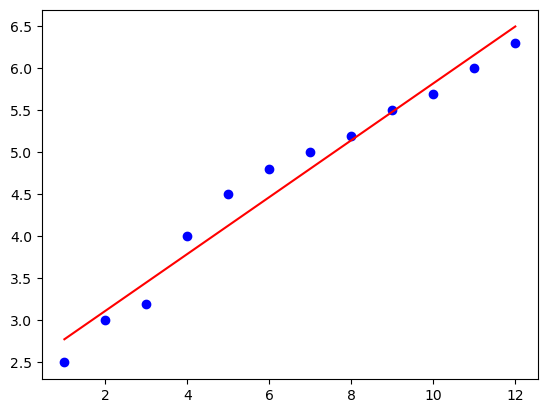

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim  
import matplotlib.pyplot as plt 
import numpy as np 

# 9. 결과 시각화
plt.scatter(months, sales, color='blue')  # 실제 매출
plt.plot(months, predicted_sales, color='red') # 선형 회귀 예측
plt.show()

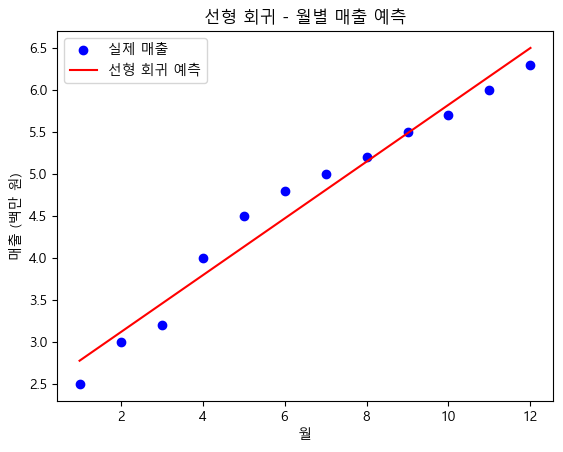

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim  
import matplotlib.pyplot as plt 
import numpy as np 

# 한글 설정
plt.rcParams['font.family'] ='Malgun Gothic'  # 맑은고딕
plt.rcParams['axes.unicode_minus'] =False   # 마이너스 깨짐 방지 

plt.scatter(months, sales, color='blue', label='실제 매출')
plt.plot(months, predicted_sales, color='red', label='선형 회귀 예측')
plt.xlabel('월')
plt.ylabel('매출 (백만 원)')
plt.title('선형 회귀 - 월별 매출 예측')
plt.legend()
plt.show()

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim  
import matplotlib.pyplot as plt 
import numpy as np 

# 평균제곱오차를 정의하면 아래와 같다.

# 손실함수로 평균제곱오차 정의
# y_pred: 예측값 (모델의 출력)
# y_true: 실제값 (정답)
def mean_squared_error(y_pred, y_true):  # 손실함수가 예측값과 실제값을 입력받는다.
    return torch.mean((y_pred - y_true) ** 2)  # 두 값의 차이의 제곱에 평균을 계산하여 손실값을 반환한다.

> ## 간단한 선형회귀 적용 실습

### `광고비에 따른 자동차 판매량 분석`

1. 필요한 라이브러리 불러오기

In [8]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

2. 데이터 준비

In [9]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# 광고비와 자동차 판매량 데이터
# 광고비 (단위: 천 원)
X = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], dtype=np.float32)

# 자동차 판매량 (단위: 대)
Y = np.array([200, 250, 280, 310, 340, 370, 400, 430, 460, 500], dtype=np.float32)

# 데이터를 PyTorch 텐서로 변환, (정규화 0~1)
X = torch.tensor(X).view(-1, 1)/1000  # 1000으로 나눠서 0~1 범위로 정규화
Y = torch.tensor(Y).view(-1, 1)/500  # 500으로 나눠서 0~1 범위로 정규화

3. 선형 회귀 모델 정의

In [10]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# 선형 회귀 모델 정의
class LinearRegressionModel(nn.Module):
    def __init__(self):
        # 부모 클래스인 nn.Module의 초기화 메서드를 호출합니다.
        super(LinearRegressionModel, self).__init__()
        # 입력 차원 1, 출력 차원 1인 선형 레이어를 정의합니다.
        self.linear = nn.Linear(1, 1)    # 입력 1, 출력 1

    def forward(self, x):
        # 순전파 함수: 입력 x를 선형 레이어를 통과시켜 출력값을 반환합니다.
        return self.linear(x)    


- LinearRegressionModel(nn.Module): nn.Module을 상속하여 선형 회귀 모델을 정의하는 클래스입니다. 
- nn.Module은 PyTorch에서 신경망 모델을 만들 때 상속하는 기본 클래스입니다.

In [11]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# 모델 초기화
model = LinearRegressionModel()

# 손실 함수와 최적화 방법 정의
criterion = nn.MSELoss()  # 평균 제곱 오차
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)  
# 경사 하강법 (학습률 0.001)

4. 모델 학습

In [12]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# 학습
epochs = 1000  # 반복 횟수

for epoch in range(epochs):
    # 순전파: 예측값 계산
    Y_pred = model(X)    
    # 모델을 사용하여 입력 X에 대한 예측값 Y_pred를 계산합니다.

    # 손실 계산
    loss = criterion(Y_pred, Y)  
    # 예측값 Y_pred와 실제값 Y 사이의 손실을 계산합니다.

    # 기울기 초기화
    optimizer.zero_grad()   # 이전 단계에서 계산된 기울기를 초기화합니다.

    # 역전파: 기울기 계산
    loss.backward()      # 손실에 대한 기울기를 계산합니다. (오차 역전파)

    # 가중치 업데이트
    optimizer.step()  # 계산된 기울기를 바탕으로 모델의 가중치를 업데이트합니다.

    # 100번마다 손실 출력
    if (epoch+1) % 100 == 0:
        # 100번째 에폭마다 현재 에폭과 손실 값을 출력합니다.
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.0251
Epoch [200/1000], Loss: 0.0157
Epoch [300/1000], Loss: 0.0100
Epoch [400/1000], Loss: 0.0067
Epoch [500/1000], Loss: 0.0048
Epoch [600/1000], Loss: 0.0036
Epoch [700/1000], Loss: 0.0029
Epoch [800/1000], Loss: 0.0024
Epoch [900/1000], Loss: 0.0022
Epoch [1000/1000], Loss: 0.0020


* Loss가 점점 줄어들고 있다.

5. 학습 결과 확인   

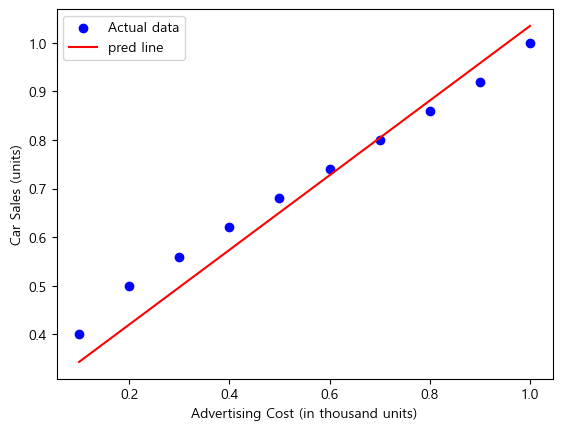

In [13]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# 모델을 사용하여 입력 X에 대한 예측값을 계산한 후, 
# 계산 그래프에서 분리하고 NumPy 배열로 변환합니다.
# detach()는 텐서를 계산 그래프에서 분리하여, 
# 더 이상 이 텐서에 대해 기울기 계산을 수행하지 않게 만듭니다.
predicted = model(X).detach().numpy()

# 학습 데이터와 예측 결과 시각화
plt.scatter(X.numpy(), Y.numpy(), color='blue', label='Actual data')  
# 실제 데이터
plt.plot(X.numpy(), predicted, color='red', label='pred line')  # 예측된 직선
plt.xlabel('Advertising Cost (in thousand units)')
plt.ylabel('Car Sales (units)')
plt.legend()
plt.show()

6. 모델 테스트

In [14]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# 새로운 광고비 1200을 1000으로 나누어 텐서로 변환
new_ad_cost = torch.tensor([[1200.0]])/1000
# 모델을 사용하여 새로운 광고비에 대한 예측 판매량을 계산
predicted_sales = model(new_ad_cost).item()*500
# 예측된 자동차 판매량을 출력
print(f"예측된 자동차 판매량 (광고비 1200): {predicted_sales:.2f} 대")

예측된 자동차 판매량 (광고비 1200): 594.03 대


## 4.2 로지스틱 회귀

- 로지스틱 회귀(Logistic Regression)는 이진 분류 문제를 해결하는 대표적인 지도학습 알고리즘입니다.
- 로지스틱 회귀의 기본 원리
  - 시그모이드 함수를 통해 0~1 사이의 확률 출력
  - 결정 경계를 기준으로 클래스 분류
  - 선형 분류기의 한 종류

### 4.2.1 로지스틱 회귀의 특징

- 이진 분류에 최적화
- 확률 기반 분류
- 선형 결정 경계 생성
- 해석이 용이한 모델

### 4.2.2 PyTorch 로지스틱 회귀 구현

- sklearn의 make_classification 함수를 사용하여 가상의 이진 분류 데이터셋을 만들고, 
- PyTorch로 간단한 로지스틱 회귀 클래스를 정의한 후, 학습 및 평가를 수행합니다. 

In [15]:
import torch
import torch.nn as nn    
import torch.optim as optim   # PyTorch의 최적화 함수들을 불러옵니다.
from sklearn.datasets import make_classification    
# 사이킷런에서 분류용 데이터를 생성하는 함수 불러오기
from sklearn.model_selection import train_test_split  
# 데이터셋을 학습용과 테스트용으로 나누는 함수 불러오기

# 데이터 생성

# make_classification: 분류용 데이터를 생성
# n_samples=1000: 데이터셋에 1000개의 샘플을 생성
# n_features=20: 각 샘플은 20개의 특성(features)을 가짐
# n_classes=2: 두 개의 클래스(0과 1)로 분류되는 문제를 설정
# random_state=42: 랜덤 시드를 42로 설정하여 같은 결과 보장
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 훈련 데이터와 테스트 데이터를 분리
#X_train: 훈련 데이터의 특성(입력 변수), 
# y_train: 훈련 데이터의 목표 변수(출력 값)
# train_test_split 함수는 데이터셋 X와 y를 훈련 세트와 테스트 세트로 나누는 함수
# test_size=0.2: 데이터의 20%는 테스트 세트, 80%는 훈련 세트
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습을 위해서는 데이터를 텐서 형태로 바꿔줘야 함
# X_train을 torch.FloatTensor로 변환하여 X_train_tensor에 저장
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).view(-1, 1) 
# y_train을 view(-1, 1)통해 2D Tensor로 변환
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).view(-1, 1)

# 로지스틱 회귀 모델 정의
# LogisticRegressionModel 클래스는 nn.Module을 상속받아 정의된 PyTorch 모델
# __init__ 메서드는 클래스의 생성자, 모델을 초기화할 때 호출, 
# 모델에 필요한 레이어들을 정의
# input_dim은 입력 데이터의 차원
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):  
        
        # super()는 부모 클래스인 nn.Module의 생성자를 호출
        # LogisticRegressionModel 클래스가 nn.Module의 모든 기능을 상속받도록 함
        super(LogisticRegressionModel, self).__init__()
        
        # self.linear는 nn.Linear(입력차원, 출력차원)로 정의된 선형 변환 레이어
        self.linear = nn.Linear(input_dim, 1)
    
    # forward 메서드는 모델의 순전파(Forward Pass)를 정의
    # 입력 x를 받아 모델을 통해 계산된 출력을 반환하는 역할
    # sgmoid출력값을 0과 1 사이의 값으로 변환
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# 로지스틱 회귀 모델 생성
# 이진크로스엔트로피
# input_dim=20은 모델이 입력으로 받을 데이터의 차원이 20임
# criterion는 손실 함수(loss function)를 지정 
# nn.BCELoss()는 Binary Cross Entropy Loss, 이진 분류 문제
model = LogisticRegressionModel(input_dim=20)
criterion = nn.BCELoss()                        
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 모델 학습
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # 순전파
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # 역전파 및 최적화
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 모델 평가
model.eval()  # 평가 모드로 전환
with torch.no_grad():           
    # 기울기 계산을 비활성화, 평가 중에는 모델의 가중치를 업데이트할 필요가 없음
    predicted = model(X_test_tensor)   
    # 테스트 데이터를 모델에 입력하여 예측값 반환
    predicted_class = (predicted > 0.5).float()  
    # 예측된 확률 값이 0.5보다 크면 1, 아니면 0
    
    # 예측된 클래스(predicted_class)와 실제 클래스(y_test_tensor) 일치 여부 확인
    # 동일한 경우 True(1), 다른 경우 False(0)로 반환
    # .sum()은 True인 값을 모두 더하여 정확히 예측한 샘플의 수를 구함
    # y_test_tensor.size(0)는 테스트 데이터의 총 샘플 수
    # 두 값을 나누면 정확도를 계산
    # .item()은 결과를 Python 숫자 값으로 변환
    # 계산된 정확도를 소수점 4자리까지 출력
    accuracy = (predicted_class.eq(y_test_tensor).sum() / y_test_tensor.size(0)).item()
    print(f'Accuracy: {accuracy:.4f}')


Epoch [10/100], Loss: 0.7201
Epoch [20/100], Loss: 0.6821
Epoch [30/100], Loss: 0.6494
Epoch [40/100], Loss: 0.6212
Epoch [50/100], Loss: 0.5967
Epoch [60/100], Loss: 0.5753
Epoch [70/100], Loss: 0.5565
Epoch [80/100], Loss: 0.5399
Epoch [90/100], Loss: 0.5251
Epoch [100/100], Loss: 0.5120
Accuracy: 0.7900


> ### 참과 거짓 분류 예제

Epoch [100/1000], Loss: 0.3777
Epoch [200/1000], Loss: 0.3076
Epoch [300/1000], Loss: 0.2704
Epoch [400/1000], Loss: 0.2461
Epoch [500/1000], Loss: 0.2280
Epoch [600/1000], Loss: 0.2131
Epoch [700/1000], Loss: 0.2001
Epoch [800/1000], Loss: 0.1884
Epoch [900/1000], Loss: 0.1774
Epoch [1000/1000], Loss: 0.1672
Accuracy: 100.00%


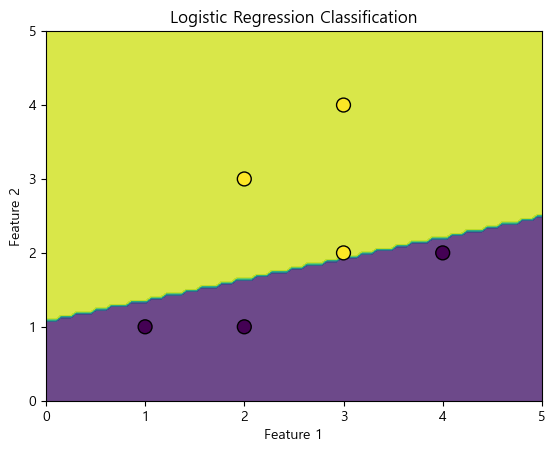

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 데이터 준비
torch.manual_seed(0)   
# 랜덤 시드를 0으로 설정하여 재현 가능한 결과를 얻기 위해 설정
data = np.array([[2, 3, 1], [1, 1, 0], [3, 2, 1], 
                [2, 1, 0], [3, 4, 1], [4, 2, 0]])
# 데이터에서 마지막 열을 제외한 나머지 부분을 X로 변환 (입력 데이터)
# 데이터에서 마지막 열만 y로 변환 (타겟 레이블)
X = torch.tensor(data[:, :-1], dtype=torch.float32)
y = torch.tensor(data[:, -1], dtype=torch.float32)

# 로지스틱 회귀 모델 정의
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.fc = nn.Linear(2, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.fc(x))

# 모델 초기화
model = LogisticRegressionModel()

# 손실 함수 및 옵티마이저
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 학습
epochs = 1000
for epoch in range(epochs):
    outputs = model(X)
    
    # squeeze() 메서드를 호출하여 차원을 축소
    loss = criterion(outputs.squeeze(), y)  
    # 예측값(outputs)과 실제값(y)을 비교하여 손실(loss)을 계산
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:  # 에포크 번호가 100으로 나누어떨어질 때마다 실행
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# 평가
with torch.no_grad():   
    predicted = model(X).round()  
    # 모델을 사용해 입력 X에 대한 예측을 수행하고, 
    # 예측값을 반올림 (0 또는 1로 만듦)
    # 예측값과 실제값 y가 일치하는 비율을 계산하여 정확도 측정
    accuracy = (predicted.squeeze() == y).sum().item() / y.size(0) * 100
    print(f'Accuracy: {accuracy:.2f}%')

# 시각화
# 입력 데이터 X의 첫 번째 특징의 최솟값, 최대값 구하고 
# 시각화할 X축 범위 설정 -1, 1로 그래프 여백 추가
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  
# 입력 데이터 X의 첫 번째 특징의 최솟값, 최대값
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# x_min에서 x_max까지 100개의 균등한 값으로 나눔, 
# meshgrid는 2D배열 되고 시각화 가능
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)  
# 텐서 변환

with torch.no_grad():
    Z = model(grid).round().numpy().reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100, linewidth=1)
plt.title('Logistic Regression Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()